In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xl = pd.ExcelFile('C:/Users/Asus/Desktop/Data_Engineer/Lap_Trinh_Python/Do_an_cuoi_ky/Data.xlsx')
df = pd.read_excel(xl, index_col= 'STT')
num = len(df)
df.head(10)

,Họ và tên,Món ăn,Đánh giá chất lượng món ăn,Đánh giá về giá món ăn,Đánh giá về dịch vụ canteen,Tần suất bạn ăn ở canteen trường trong một tuần
STT,,,,,,
1,Dương Thành Sơn,Cơm tấm,Bình thường,Hợp lí,Bình thường,Thỉnh thoảng (2 -> 3)
2,Nguyễn Đinh Hồng Phúc,Phở bò,Ngon,Hợp lí,Tốt,Thỉnh thoảng (2 -> 3)
3,Nguyễn Thị Trang,Phở bò,Rất tệ,Hợp lí,Tốt,Hiếm khi (0 -> 1)
4,Trần Văn Đức,Bò xào hành tây,Ngon,Rẻ,Rất tốt,Thỉnh thoảng (2 -> 3)
5,Phạm Thị Hằng,Cơm chiên đùi gà,Tệ,Rẻ,Bình thường,Thường xuyên (4 -> 5)
...,...,...,...,...,...,...
396,Lê Văn Đông,Bánh mì chảo,Tệ,Rẻ,Tốt,Mỗi ngày
397,Nguyễn Thị Phúc,Mì cay,Ngon,Hợp lí,Rất tốt,Thường xuyên (4 -> 5)
398,Trần Văn Tuấn,Cơm tấm,Rất ngon,Rẻ,Tốt,Mỗi ngày


------------------------------------------------------------------------MÓN ĂN ĐƯỢC MUA NHIỀU NHẤT--------------------------------------------------------------------------------------------------

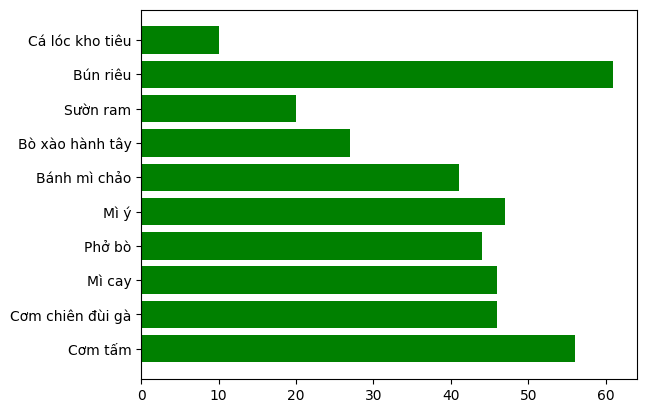

In [18]:
ser_MonAn = pd.Series(df['Món ăn'])
MonAn_SoLuong = [0]*10
MonAn_DanhSach = ['Cơm tấm','Cơm chiên đùi gà','Mì cay','Phở bò','Mì ý','Bánh mì chảo','Bò xào hành tây','Sườn ram','Bún riêu','Cá lóc kho tiêu']
for i in range(1,num):
    for j in range(10):
        if ser_MonAn[i]==MonAn_DanhSach[j]:
            MonAn_SoLuong[j]+=1
plt.barh(MonAn_DanhSach,MonAn_SoLuong,color='green')
plt.show()

----------------------------------------------------------------MÓN ĂN ĐƯỢC NHIỀU KHÁCH HÀNG ĐÁNH GIÁ CAO--------------------------------------------------------------------------------------

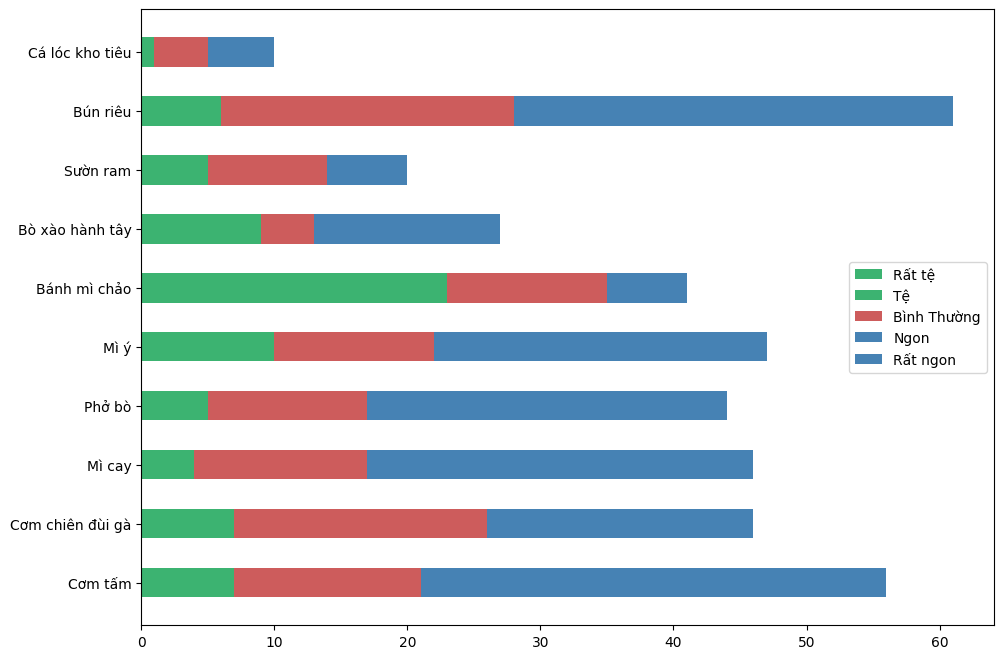

In [112]:
ser_DanhGiaMonAn = pd.Series(df['Đánh giá chất lượng món ăn'])
DanhGia = ['Rất tệ','Tệ','Bình thường','Ngon','Rất ngon']
KetQua_DanhGiaMonAn = []
for i in range(10):
    inner_list = [0] * 5
    KetQua_DanhGiaMonAn.append(inner_list)
for i in range(1,num):
    for j in range (5):
        if ser_DanhGiaMonAn[i] == DanhGia[j]:
            for k in range (10):
                if ser_MonAn[i]==MonAn_DanhSach[k]:
                    KetQua_DanhGiaMonAn[k][j] +=1

DanhGia_RatTe = [0]*10
DanhGia_Te = [0]*10
DanhGia_BinhThuong = [0]*10
DanhGia_Ngon = [0]*10
DanhGia_RatNgon = [0]*10
for i in range (10):
    for j in range (5):
        if j == 0 : 
            DanhGia_RatTe[i] += KetQua_DanhGiaMonAn[i][j]
        if j == 1 : 
            DanhGia_Te[i] += KetQua_DanhGiaMonAn[i][j]
        if j == 2 :
            DanhGia_BinhThuong[i] += KetQua_DanhGiaMonAn[i][j]
        if j == 3 : 
            DanhGia_Ngon[i] += KetQua_DanhGiaMonAn[i][j]
        if j == 4 : 
            DanhGia_RatNgon[i] += KetQua_DanhGiaMonAn[i][j]

width = 0.5
plt.figure(figsize=(11, 8))
plt.barh(MonAn_DanhSach,DanhGia_RatTe,width,color='mediumseagreen',label='Rất tệ')
plt.barh(MonAn_DanhSach,DanhGia_Te,width,color='mediumseagreen',label='Tệ',left=DanhGia_RatTe)
plt.barh(MonAn_DanhSach,DanhGia_BinhThuong,width,color='indianred',label='Bình Thường',left =np.add(DanhGia_RatTe, DanhGia_Te))
plt.barh(MonAn_DanhSach,DanhGia_Ngon,width,color='steelblue',label='Ngon',left=np.add(DanhGia_RatTe, np.add(DanhGia_Te,DanhGia_BinhThuong)))
plt.barh(MonAn_DanhSach,DanhGia_RatNgon,width,color='steelblue',label='Rất ngon',left =np.add(DanhGia_RatTe, np.add(DanhGia_Te,np.add(DanhGia_BinhThuong,DanhGia_Ngon))))
plt.legend(loc='best')

plt.show()
###sùuisff
